<h2 style = "padding:10px 5px; ">Importing Required Libraries</h2>

<h5 style = "color:grey;">checking the files in current directory </h5>


In [10]:
import os
print(os.getcwd())  
import os
files_in_directory = os.listdir()
print(files_in_directory)

c:\Users\kaifk\lpth\.vscode\data_science_project\UpSkill-Campus-Internship\Prediction of Agriculture Crop Production In India
['Crop_Prediction._datafile2.ipynb', 'Crop_Prediction._datafile_3.ipynb', 'crop_prediction_datafile1.ipynb', 'crop_prediction_datafile4ipynb.ipynb', 'datafile _4.csv', 'datafile.csv', 'datafile_2.csv', 'datafile_3.csv', 'datafile_5.csv', 'datasets', 'decision_tree', 'predicted_model.ipynb', 'prediction-of-agriculture-crop-production-in-india.ipynb', 'produce.csv']


<h5 style="color:grey "> Importing libraries </h5>

In [11]:
import pandas as pd
import numpy as np
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                 '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
import matplotlib.pyplot as plt
import seaborn as sns
import nbformat
import ipywidgets
from ipywidgets import interact
from ipywidgets import interact_manual
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import export_graphviz
import graphviz

plt.rcParams['figure.figsize'] = (12,6)
plt.style.use('fivethirtyeight')



# <h5 style="color:grey "> Importing datasets  </h5>


In [12]:

data1 = pd.read_csv(r'C:\Users\kaifk\lpth\.vscode\data_science_project\datasets\Project4_Ag.zip\datafile4.csv')
data2 = pd.read_csv(r'C:\Users\kaifk\lpth\.vscode\data_science_project\datasets\Project4_Ag.zip\datafile2.csv')
data3= pd.read_csv(r'C:\Users\kaifk\lpth\.vscode\data_science_project\datasets\Project4_Ag.zip\datafile.csv')
datafile = pd.read_csv(r'C:\Users\kaifk\lpth\.vscode\data_science_project\datasets\Project4_Ag.zip\datafile.csv')
produce = pd.read_csv(r'C:\Users\kaifk\lpth\.vscode\data_science_project\datasets\Project4_Ag.zip\produce.csv')



In [13]:
data1.head()

Crop           State  Cost of Cultivation (`/Hectare) A2+FL  \
0  ARHAR   Uttar Pradesh                                9794.05   
1  ARHAR       Karnataka                               10593.15   
2  ARHAR         Gujarat                               13468.82   
3  ARHAR  Andhra Pradesh                               17051.66   
4  ARHAR     Maharashtra                               17130.55   

   Cost of Cultivation (`/Hectare) C2  Cost of Production (`/Quintal) C2  \
0                            23076.74                            1941.55   
1                            16528.68                            2172.46   
2                            19551.90                            1898.30   
3                            24171.65                            3670.54   
4                            25270.26                            2775.80   

   Yield (Quintal/ Hectare)   
0                       9.83  
1                       7.47  
2                       9.59  
3                       6.42  
4                       8.72

In [14]:

data1 = data1.rename(columns={
    'Crop': 'Crop',
    'State': 'State',
    'Cost of Cultivation (`/Hectare) A2+FL': 'Cost_A2_FL',
    'Cost of Cultivation (`/Hectare) C2': 'Cost_C2',
    'Cost of Production (`/Quintal) C2': 'Cost_Production',
    'Yield (Quintal/ Hectare) ': 'Yield'
})

data1.head()

Crop           State  Cost_A2_FL   Cost_C2  Cost_Production  Yield
0  ARHAR   Uttar Pradesh     9794.05  23076.74          1941.55   9.83
1  ARHAR       Karnataka    10593.15  16528.68          2172.46   7.47
2  ARHAR         Gujarat    13468.82  19551.90          1898.30   9.59
3  ARHAR  Andhra Pradesh    17051.66  24171.65          3670.54   6.42
4  ARHAR     Maharashtra    17130.55  25270.26          2775.80   8.72

<h2 style = "padding:10px 5px; ">Data Preprocessing and Exploratory Data Analysis</h2>

In [15]:
#shape analysis of the dataframe

print( data1.shape[1] , data1.shape[0] )


6 49


<span> 6 columns and 49 rows are present in the dataframe </span>

In [16]:
data1.describe(include = 'object')

Crop           State
count      49              49
unique     10              13
top     ARHAR  Andhra Pradesh
freq        5               8

<span> There are 10 different varieties of crops and 13 states in which these crops are produced</span>

In [17]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             49 non-null     object 
 1   State            49 non-null     object 
 2   Cost_A2_FL       49 non-null     float64
 3   Cost_C2          49 non-null     float64
 4   Cost_Production  49 non-null     float64
 5   Yield            49 non-null     float64
dtypes: float64(4), object(2)
memory usage: 2.4+ KB


In [18]:
data1.columns

Index(['Crop', 'State', 'Cost_A2_FL', 'Cost_C2', 'Cost_Production', 'Yield'], dtype='object')

In [19]:
data1.isnull().sum().sum()

0

In [20]:
data1.isna().sum()/len(data1)*100

Crop               0.0
State              0.0
Cost_A2_FL         0.0
Cost_C2            0.0
Cost_Production    0.0
Yield              0.0
dtype: float64

In [21]:
data1.fillna(0, inplace=True)
data1.duplicated().sum()

0

In [22]:
data1.describe()

Cost_A2_FL       Cost_C2  Cost_Production        Yield
count     49.000000     49.000000        49.000000    49.000000
mean   20363.537347  31364.666735      1620.537755    98.086735
std    13561.435306  20095.783569      1104.990472   245.293123
min     5483.540000   7868.640000        85.790000     1.320000
25%    12774.410000  19259.840000       732.620000     9.590000
50%    17022.000000  25909.050000      1595.560000    13.700000
75%    24731.060000  35423.480000      2228.970000    36.610000
max    66335.060000  91442.630000      5777.480000  1015.450000

<h5> Visualization </h5>

In [23]:
data1.head()

Crop           State  Cost_A2_FL   Cost_C2  Cost_Production  Yield
0  ARHAR   Uttar Pradesh     9794.05  23076.74          1941.55   9.83
1  ARHAR       Karnataka    10593.15  16528.68          2172.46   7.47
2  ARHAR         Gujarat    13468.82  19551.90          1898.30   9.59
3  ARHAR  Andhra Pradesh    17051.66  24171.65          3670.54   6.42
4  ARHAR     Maharashtra    17130.55  25270.26          2775.80   8.72

In [24]:
df_categorical = data1[['Crop', 'State']]

In [25]:
df_categorical.head()

Crop           State
0  ARHAR   Uttar Pradesh
1  ARHAR       Karnataka
2  ARHAR         Gujarat
3  ARHAR  Andhra Pradesh
4  ARHAR     Maharashtra

In [26]:
print(data1['Crop'].unique())
print(data1['State'].unique())

['ARHAR' 'COTTON' 'GRAM' 'GROUNDNUT' 'MAIZE' 'MOONG' 'PADDY'
 'RAPESEED AND MUSTARD' 'SUGARCANE' 'WHEAT']
['Uttar Pradesh' 'Karnataka' 'Gujarat' 'Andhra Pradesh' 'Maharashtra'
 'Punjab' 'Haryana' 'Rajasthan' 'Madhya Pradesh' 'Tamil Nadu' 'Bihar'
 'Orissa' 'West Bengal']


In [27]:
data1.columns

Index(['Crop', 'State', 'Cost_A2_FL', 'Cost_C2', 'Cost_Production', 'Yield'], dtype='object')

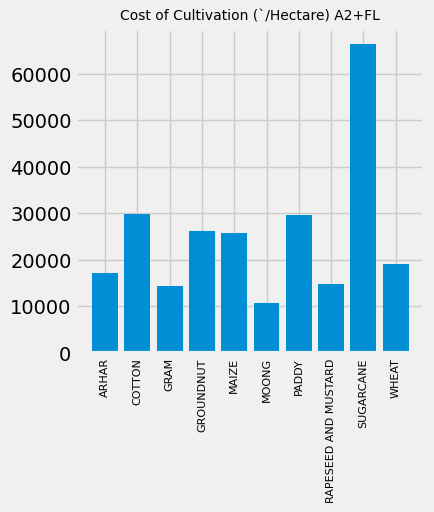

In [28]:
plt.figure(figsize=(4, 4))  # Set the size of the plot (width=10 inches, height=6 inches)
plt.bar(data1['Crop'], data1['Cost_A2_FL'], width=0.8)
plt.xticks(rotation=90 ,fontsize=8)
plt.title('Cost of Cultivation (`/Hectare) A2+FL',fontsize=10)
plt.show()

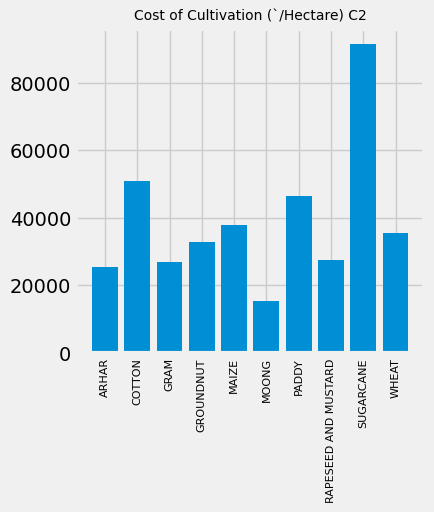

In [29]:
plt.figure(figsize=(4, 4))  

plt.bar(data1['Crop'], data1['Cost_C2'], width=0.8)
plt.xticks(rotation=90,fontsize=8)
plt.title('Cost of Cultivation (`/Hectare) C2',fontsize=10)
plt.show()

From above two charts we can see that the cost of cultivaation for both `/Hectare) A2+FL' and /Hectare) C2' is highest for Sugacane and lowest for Moong.

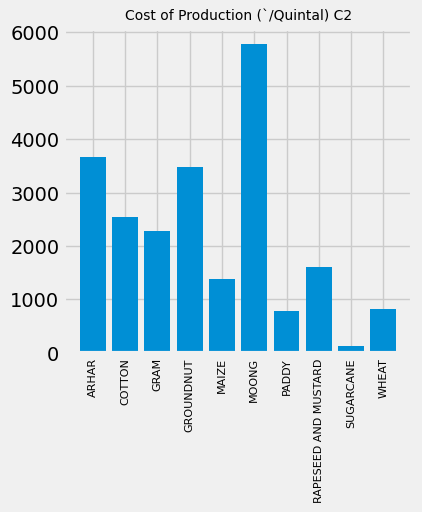

In [30]:
plt.figure(figsize=(4,4))
plt.bar(data1['Crop'], data1['Cost_Production'], width=0.8)
plt.xticks(rotation=90,fontsize=8)
plt.title('Cost of Production (`/Quintal) C2',fontsize=10)
plt.show()

The 'Cost of Production (`/Quintal) C2' is highest for Moong and lowest for Sugarcane.

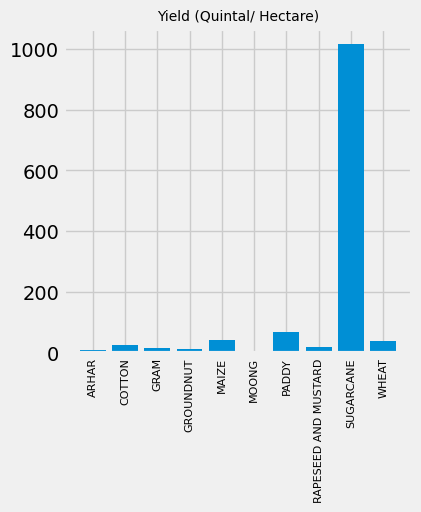

In [31]:
plt.figure(figsize=(4,4))
plt.bar(data1['Crop'], data1['Yield'], width=0.8)
plt.xticks(rotation=90,fontsize=8)
plt.title('Yield (Quintal/ Hectare)',fontsize=10)
plt.show()

The 'Cost of Cultivation (`/Hectare) A2+FL' is highest for Sugarcane and lowest for Moong.

In [32]:
data1.columns


Index(['Crop', 'State', 'Cost_A2_FL', 'Cost_C2', 'Cost_Production', 'Yield'], dtype='object')

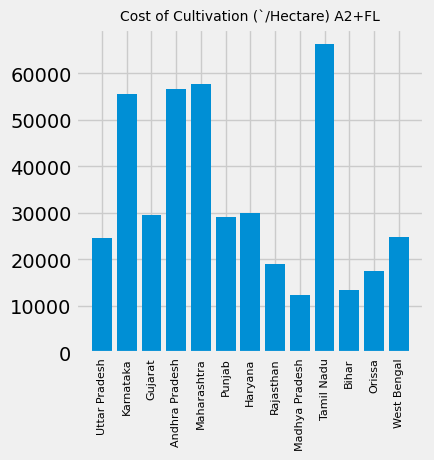

In [33]:
plt.figure(figsize=(4,4))
plt.bar(data1['State'], data1['Cost_A2_FL'], width=0.8)
plt.xticks(rotation=90,fontsize=8)
plt.title('Cost of Cultivation (`/Hectare) A2+FL',fontsize=10)
plt.show()

From above chart we can say that the 'Cost of Cultivation (`/Hectare) A2+FL' is highest in Tamil Nadu and lowest in Madhya Pradesh.

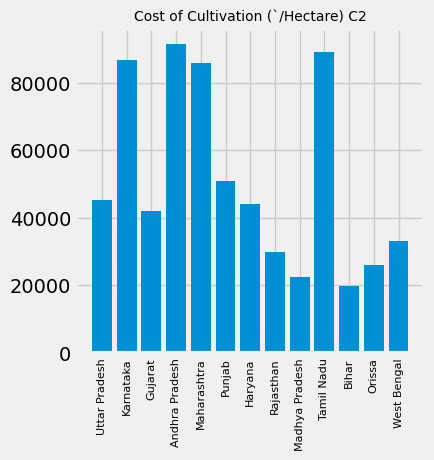

In [34]:
plt.figure(figsize=(4,4))

plt.bar(data1['State'], data1['Cost_C2'], width=0.8)
plt.xticks(rotation=90,fontsize=8)
plt.title('Cost of Cultivation (`/Hectare) C2',fontsize=10)
plt.show()

The 'Cost of Cultivation (`/Hectare) C2' is highest in Andhra Pradesh and lowest in Bihar.

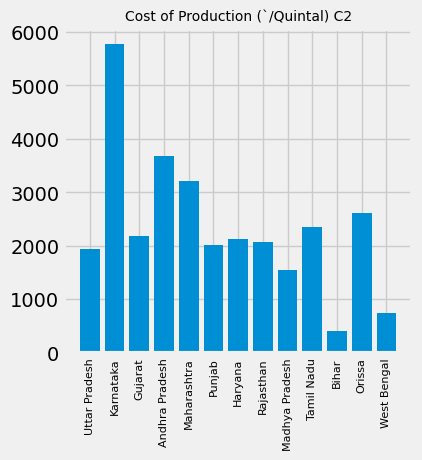

In [35]:
plt.figure(figsize=(4,4))

plt.bar(data1['State'], data1['Cost_Production'], width=0.8)
plt.xticks(rotation=90,fontsize=8)
plt.title('Cost of Production (`/Quintal) C2',fontsize=10)
plt.show()

The 'Cost of Production (`/Quintal) C2' is highest in Karnataka and lowest in Bihar.

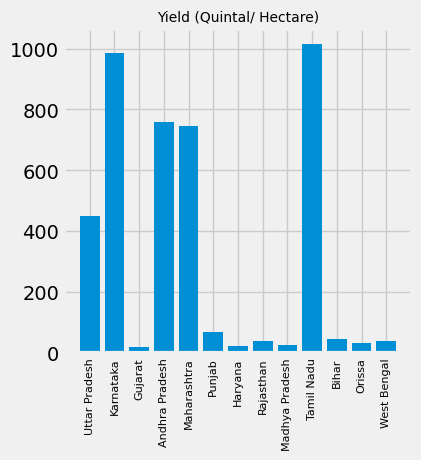

In [36]:
plt.figure(figsize=(4,4))

plt.bar(data1['State'], data1['Yield'], width=0.8)
plt.xticks(rotation=90,fontsize=8)
plt.title('Yield (Quintal/ Hectare)',fontsize=10)
plt.show()

The 'Yield (Quintal/ Hectare)' is highest and almost same in Karnataka and Tamil Nadu and lowest and almost same in Haryana, Gujrat and Madhya Pradesh

<h5> Kernel Densities </h5>

<Figure size 1000x600 with 0 Axes>

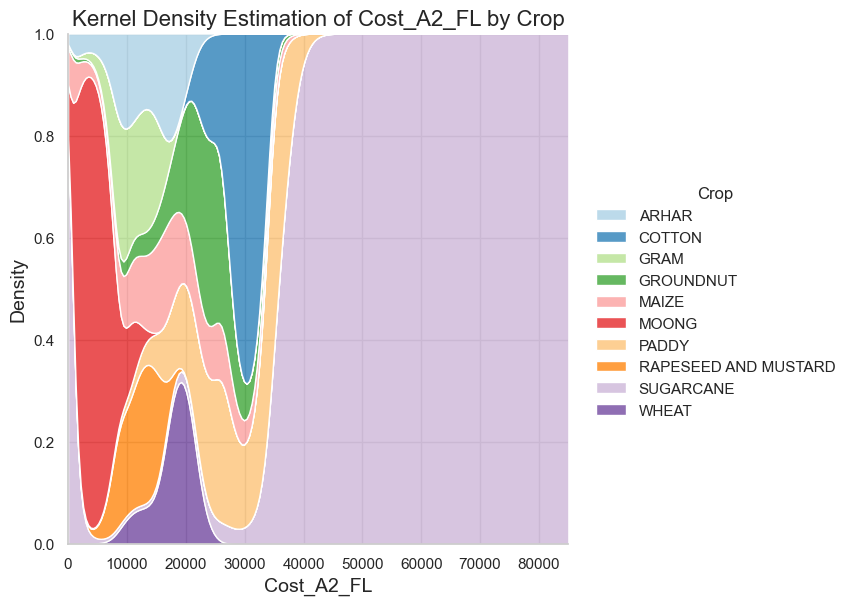

<Figure size 1000x600 with 0 Axes>

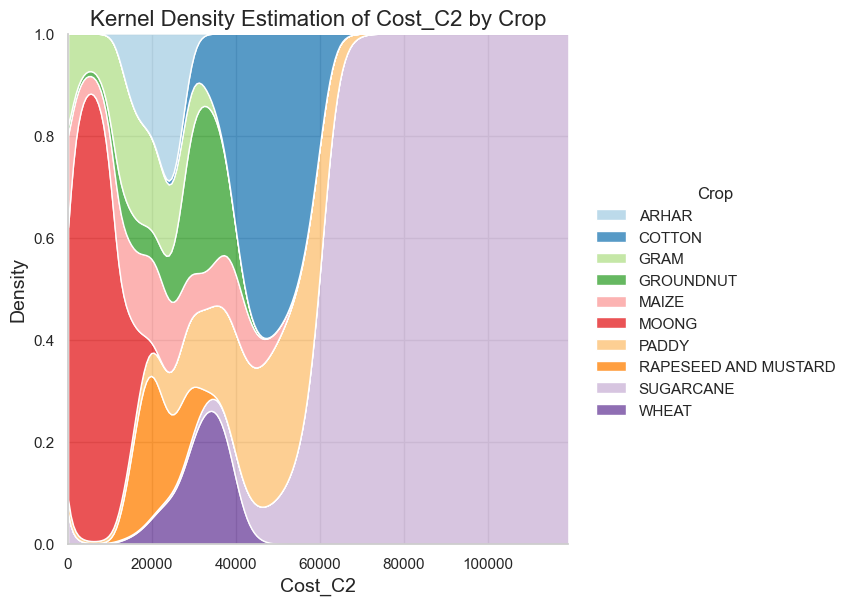

: 

: 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

custom_palette = sns.color_palette("Paired", n_colors=len(data1['Crop'].unique()))

# Plotting 'Cost_A2_FL'
plt.figure(figsize=(10, 6))
sns.displot(data=data1, x='Cost_A2_FL', hue="Crop", kind="kde", height=6, multiple="fill", clip=(0, None), palette=custom_palette)
plt.title('Kernel Density Estimation of Cost_A2_FL by Crop', fontsize=16)
plt.xlabel('Cost_A2_FL', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

# Plotting 'Cost_C2'
plt.figure(figsize=(10, 6))
sns.displot(data=data1, x='Cost_C2', hue="Crop", kind="kde", height=6, multiple="fill", clip=(0, None), palette=custom_palette)
plt.title('Kernel Density Estimation of Cost_C2 by Crop', fontsize=16)
plt.xlabel('Cost_C2', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

# Plotting 'Cost_Production'
plt.figure(figsize=(10, 6))
sns.displot(data=data1, x='Cost_Production', hue="Crop", kind="kde", height=6, multiple="fill", clip=(0, None), palette=custom_palette)
plt.title('Kernel Density Estimation of Cost_Production by Crop', fontsize=16)
plt.xlabel('Cost_Production', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()




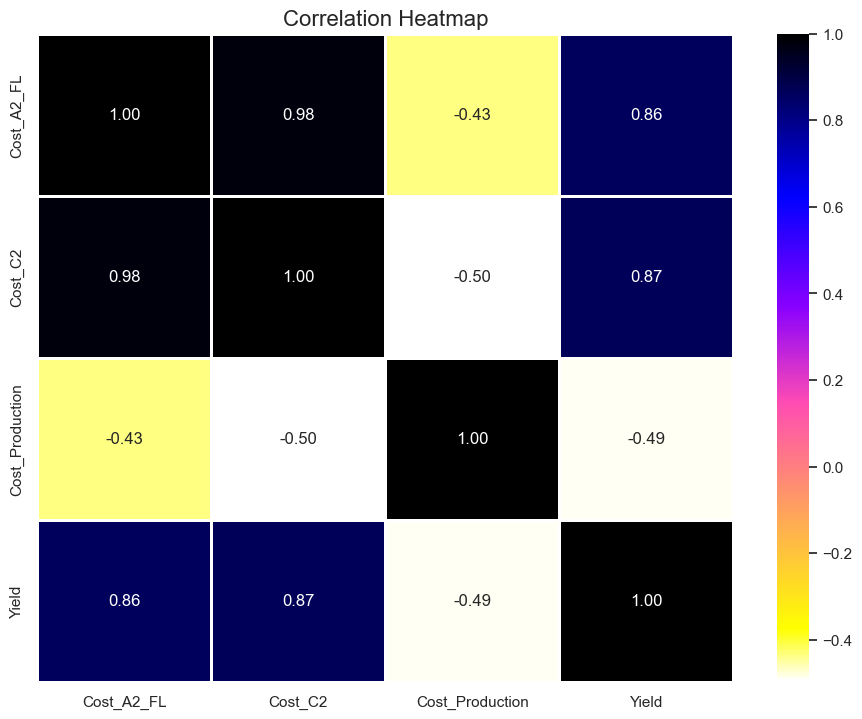

In [ ]:
numeric_data = data1.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='gnuplot2_r', fmt='.2f', linewidths=1)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In [ ]:
states_in_data = data1['State'].unique()
print('\n The states in the data:', states_in_data)

dominant_state = data1['State'].value_counts().idxmax()
print('\n The Dominant state:', dominant_state)

less_dominant_state = data1['State'].value_counts().idxmin()
print('\n The Less Dominant State:', less_dominant_state)

max_and_min_yield = (data1['Yield'].min(), data1['Yield'].max())
print('\nThe Minimum yield range:', max_and_min_yield)

most_demand_crop = data1['Crop'].value_counts().idxmax()
print('\nThe most demanded crop in the data:', most_demand_crop)

less_demand_crop = data1['Crop'].value_counts().idxmax()
print('\nThe less demanded crop in the data:', less_demand_crop)


 The states in the data: ['Uttar Pradesh' 'Karnataka' 'Gujarat' 'Andhra Pradesh' 'Maharashtra'
 'Punjab' 'Haryana' 'Rajasthan' 'Madhya Pradesh' 'Tamil Nadu' 'Bihar'
 'Orissa' 'West Bengal']

 The Dominant state: Andhra Pradesh

 The Less Dominant State: Bihar

The Minimum yield range: (1.32, 1015.45)

The most demanded crop in the data: ARHAR

The less demanded crop in the data: ARHAR


In [ ]:
sorted_data = data1.sort_values(by='Yield', ascending=False)

top_10_yield_data = sorted_data.head(10)

avg_yield_top_10 = top_10_yield_data['Yield'].mean()
print("Average Yield of the Top 10 Yield Values:", avg_yield_top_10)


Average Yield of the Top 10 Yield Values: 420.13500000000005


In [ ]:
styled_avg_yield = top_10_yield_data.head(10).style.background_gradient(cmap='tab20b')
styled_avg_yield

<h5> Distributions </h5>

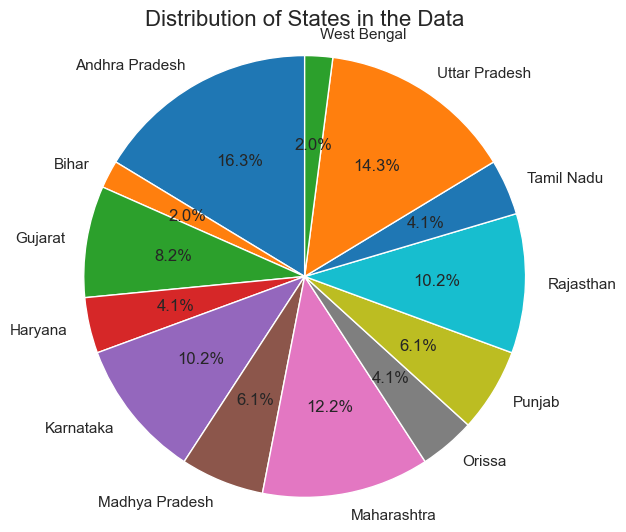

In [ ]:
import matplotlib.pyplot as plt

states_in_data = data1['State'].unique()

state_counts = data1['State'].value_counts().sort_index()


plt.figure(figsize=(6, 6))  
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=90, colors=custom_colors)
plt.title('Distribution of States in the Data', fontsize=16)
plt.axis('equal')
plt.show()


<h4> Top 10 Crops </h4>


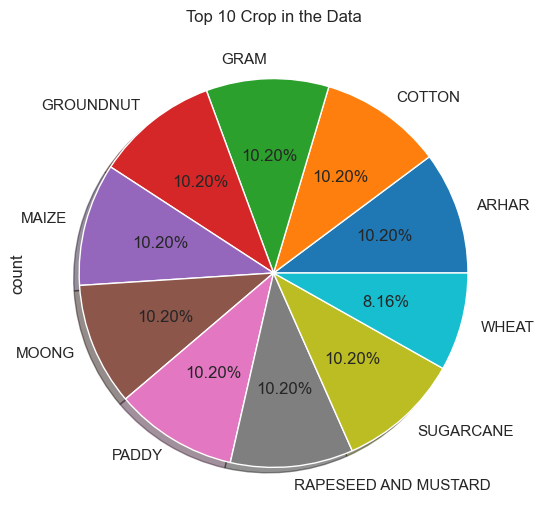

In [ ]:
#create a pie chart to visualize the top 10 crop in the data

label = ['ARHAR', 'COTTON', 'GRAM', 'GROUNDNUT', 'MAIZE', 'MOONG', 'PADDY', 'RAPESEED AND MUSTARD', 'SUGARCANE', 'WHEAT']

data1['Crop'].value_counts().sort_values(ascending=False).head(10)\
.plot(kind = 'pie',labels=label, colors=custom_colors,
      autopct ='%1.2f%%',
      shadow=True)
plt.title('Top 10 Crop in the Data')
plt.show()

In [ ]:
data1['State'].unique()

array(['Uttar Pradesh', 'Karnataka', 'Gujarat', 'Andhra Pradesh',
       'Maharashtra', 'Punjab', 'Haryana', 'Rajasthan', 'Madhya Pradesh',
       'Tamil Nadu', 'Bihar', 'Orissa', 'West Bengal'], dtype=object)

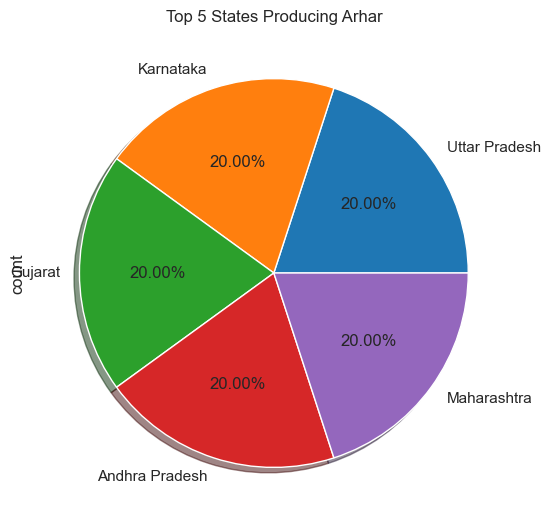

In [ ]:
#create a pie chart to visualization arhar produced by the states
arhar = data1[data1['Crop']=='ARHAR']
label = ['Uttar Pradesh','Karnataka','Gujarat','Andhra Pradesh',
         'Maharashtra','Punjab','Haryana','Rajasthan','Madhya Pradesh',
         'Tamil Nadu','Bihar','Orissa','West Bengal']
arhar['State'].value_counts().head(10).sort_values(ascending=False)\
    .plot(kind='pie', labels=label,
          colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'],
          autopct='%1.2f%%',
          shadow=True)
plt.title("Top 5 States Producing Arhar")
plt.show()


<h5> > Top 5 States Producing Wheat </h5>


In [ ]:
crop_stats = data1.groupby('Crop')[['Cost_A2_FL', 'Cost_C2', 'Cost_Production']].agg(['min', 'max'])
crop_stats.head(10)


Cost_A2_FL             Cost_C2           Cost_Production  \
                            min       max       min       max             min   
Crop                                                                            
ARHAR                   9794.05  17130.55  16528.68  25270.26         1898.30   
COTTON                 23711.44  29918.97  33116.82  50828.83         2003.76   
GRAM                    8552.69  14421.98  12610.85  26762.09         1551.94   
GROUNDNUT              13647.10  26078.66  17314.20  32683.46         1918.92   
MAIZE                  13513.92  25687.09  19810.29  37801.85          404.43   
MOONG                   5483.54  10780.76   7868.64  15371.45         2068.67   
PADDY                  17022.00  29664.84  25909.05  46450.20          669.86   
RAPESEED AND MUSTARD    8686.43  14715.27  17705.93  27507.54         1251.12   
SUGARCANE              24538.32  66335.06  45239.51  91442.63           85.79   
WHEAT                  12464.40  19119.08  22489.75  35423.48          683.58   

                               
                          max  
Crop                           
ARHAR                 3670.54  
COTTON                2539.47  
GRAM                  2277.68  
GROUNDNUT             3484.01  
MAIZE                 1387.36  
MOONG                 5777.48  
PADDY                  789.90  
RAPESEED AND MUSTARD  1610.40  
SUGARCANE              119.72  
WHEAT                  810.25

<h5> Cost of Cultivation (/Hectare) A2+FL by Crop</h5>


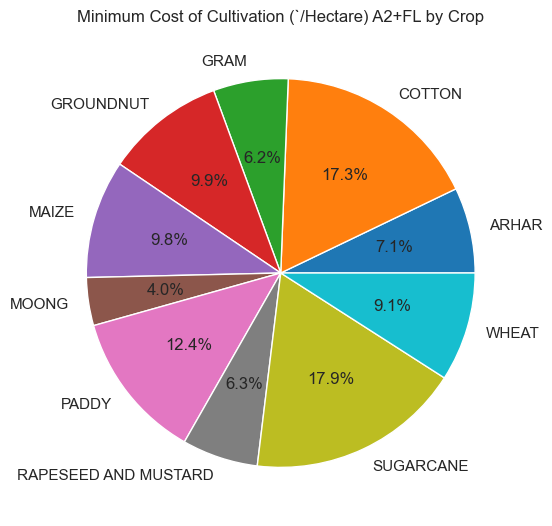

In [ ]:
import matplotlib.pyplot as plt

crop_data = {
    'Crop': ['ARHAR', 'COTTON', 'GRAM', 'GROUNDNUT', 'MAIZE', 'MOONG', 'PADDY', 'RAPESEED AND MUSTARD', 'SUGARCANE', 'WHEAT'],
    'min_Cost_A2_FL': [9794.05, 23711.44, 8552.69, 13647.1, 13513.92, 5483.54, 17022.0, 8686.43, 24538.32, 12464.4],
    'max_Cost_A2_FL': [17130.55, 29918.97, 14421.98, 26078.66, 25687.09, 10780.76, 29664.84, 14715.27, 66335.06, 19119.08],
    'min_Cost_C2': [16528.68, 33116.82, 12610.85, 17314.2, 19810.29, 7868.64, 25909.05, 17705.93, 45239.51, 22489.75],
    'max_Cost_C2': [25270.26, 50828.83, 26762.09, 32683.46, 37801.85, 15371.45, 46450.2, 27507.54, 91442.63, 35423.48],
    'min_Cost_Production': [1898.3, 2003.76, 1551.94, 1918.92, 404.43, 2068.67, 669.86, 1251.12, 85.79, 683.58],
    'max_Cost_Production': [3670.54, 2539.47, 2277.68, 3484.01, 1387.36, 5777.48, 789.9, 1610.4, 119.72, 810.25]
}

crop_df = pd.DataFrame(crop_data)

crop_df.set_index('Crop', inplace=True)

fig, ax = plt.subplots(figsize=(8, 6))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2c2c2', '#b3e6cc', '#e6b3cc', '#e6e6cc']
ax.pie(crop_df['min_Cost_A2_FL'], labels=crop_df.index, autopct='%1.1f%%', colors=custom_colors)
ax.set_title('Minimum Cost of Cultivation (`/Hectare) A2+FL by Crop')

plt.show()


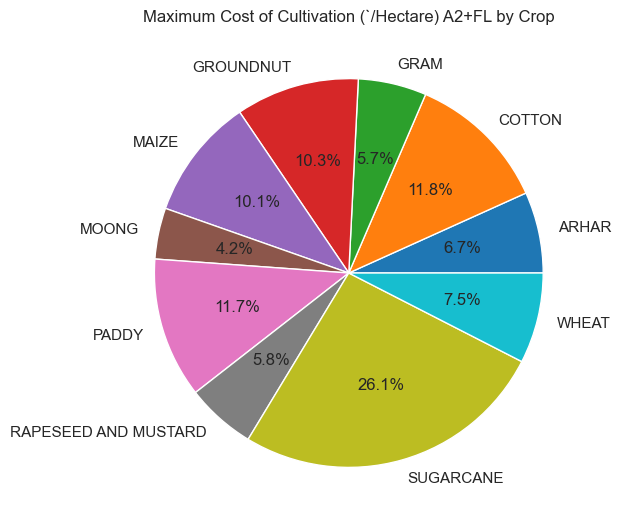

In [ ]:
# Plotting
fig, ax = plt.subplots(figsize=(8, 6))

ax.pie(crop_df['max_Cost_A2_FL'], labels=crop_df.index, autopct='%1.1f%%', colors=custom_colors)
ax.set_title('Maximum Cost of Cultivation (`/Hectare) A2+FL by Crop')

plt.show()


<h5>Cost of Cultivation (/Hectare) C2 by Crop</h5>


In [ ]:

fig = go.Figure(data=[go.Pie(labels=crop_df.index, values=crop_df['min_Cost_C2'], hole=0.3, textinfo='label+percent', marker=dict(colors=custom_colors))])
fig.update_layout(title='Minimum Cost of Cultivation (`/Hectare) C2 by Crop')
fig.show()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Pie(labels=crop_df.index, values=crop_df['max_Cost_C2'], hole=0.3, textinfo='label+percent', marker=dict(colors=custom_colors))])
fig.update_layout(title='Maximum Cost of Cultivation (`/Hectare) C2 by Crop')

fig.show()


<h5>Cost of Production by Crop</h5>



In [ ]:
import plotly.graph_objects as go

# Create the sunburst chart
fig = go.Figure(go.Sunburst(
    labels=crop_df.index,
    parents=[''] * len(crop_df.index),
    values=crop_df['min_Cost_Production'],
    branchvalues='total',
    hovertemplate='<b>%{label}</b><br>Value: %{value}<br>Percentage: %{percentRoot:.1%}',
))

fig.update_traces(textinfo='label+percent root')
fig.update_layout(
    title='Minimum Cost Production by Crop',
    sunburstcolorway=custom_colors,
)

# Show the sunburst chart
fig.show()


In [ ]:
# Create the sunburst chart
fig = go.Figure(go.Sunburst(
    labels=crop_df.index,
    parents=[''] * len(crop_df.index),
    values=crop_df['max_Cost_Production'],
    branchvalues='total',
    hovertemplate='<b>%{label}</b><br>Value: %{value}<br>Percentage: %{percentRoot:.1%}',
))

fig.update_traces(textinfo='label+percent root')
fig.update_layout(
    title='Maximum Cost Production by Crop',
    sunburstcolorway=custom_colors,
)

# Show the sunburst chart
fig.show()

In [ ]:
# Find the crop with the minimum cost of production
crop_min_cost = data1[data1['Cost_Production'] == data1['Cost_Production'].min()]['Crop']
crop_min_cost

44    SUGARCANE
Name: Crop, dtype: object

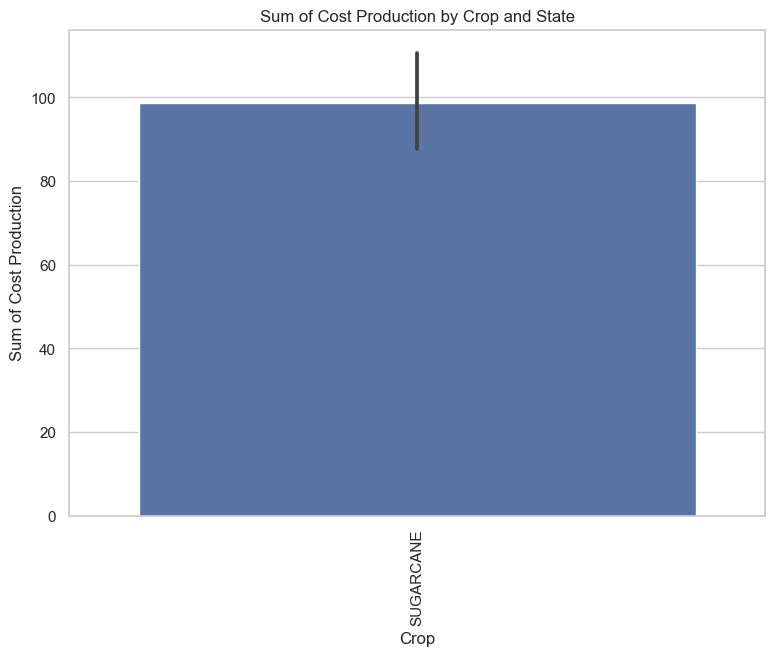

In [ ]:
# Find the crop with the minimum cost of production
crop_min_cost = data1[data1['Crop'] == 'SUGARCANE'].groupby(['State', 'Crop'])['Cost_Production'].sum()

plt.figure(figsize=(8, 6))
sns.barplot(x=crop_min_cost.index.get_level_values('Crop'), y=crop_min_cost.values)
plt.xlabel('Crop')
plt.ylabel('Sum of Cost Production')
plt.title('Sum of Cost Production by Crop and State')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Find the crop with the maximum cost of production
crop_max_cost = data1[data1['Cost_Production'] == data1['Cost_Production'].max()]['Crop']
crop_max_cost

27    MOONG
Name: Crop, dtype: object

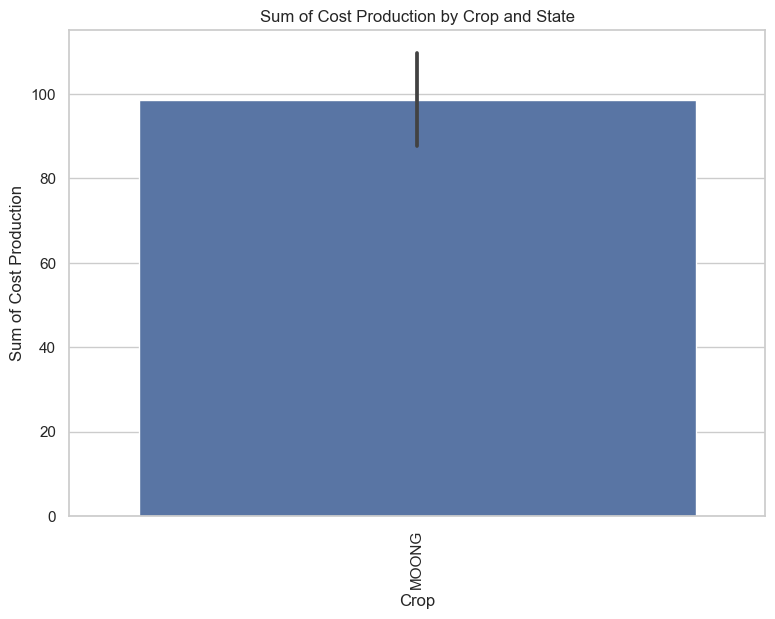

In [ ]:
crop_max_cost = data1[data1['Crop'] == 'MOONG'].groupby(['State', 'Crop'])['Cost_Production'].sum()

plt.figure(figsize=(8, 6))
sns.barplot(x=crop_max_cost.index.get_level_values('Crop'), y=crop_min_cost.values)
plt.xlabel('Crop')
plt.ylabel('Sum of Cost Production')
plt.title('Sum of Cost Production by Crop and State')
plt.xticks(rotation=90)
plt.show()


<h3> Yield</h3>



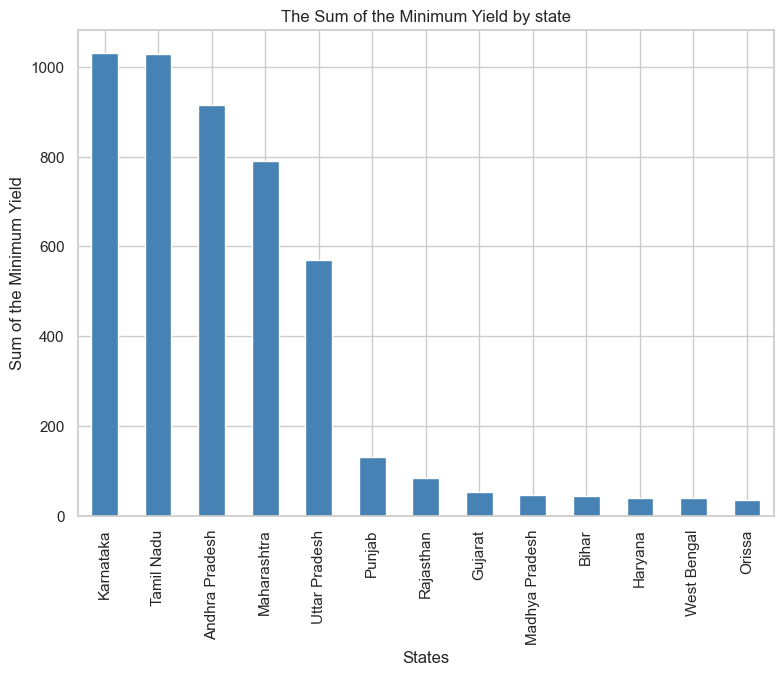

In [ ]:
import matplotlib.pyplot as plt
data1.groupby('State')['Yield'].sum().sort_values(ascending=False).plot(kind='bar', title="The Sum of the Minimum Yield by state", figsize=(8, 6), color='steelblue')
plt.xlabel("States")
plt.ylabel("Sum of the Minimum Yield")
plt.show()


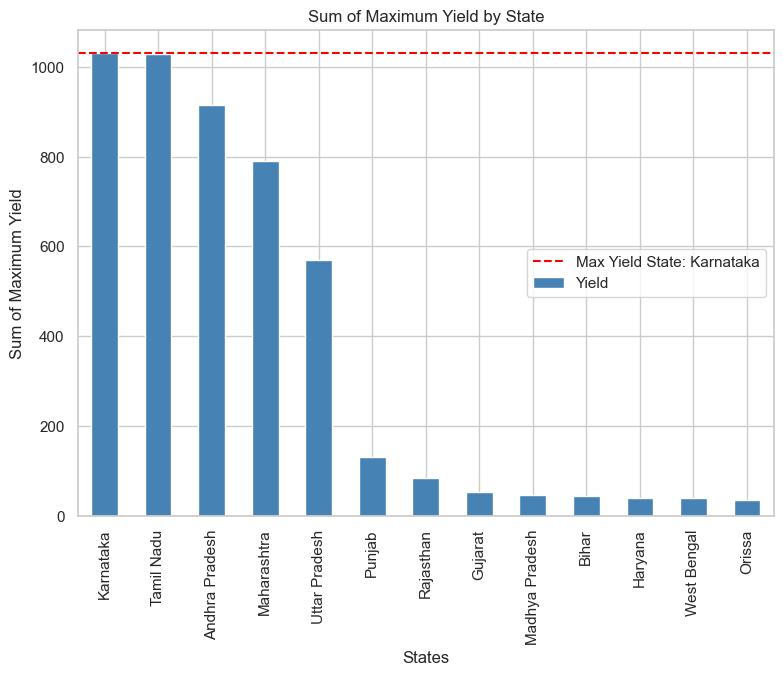

In [ ]:
state_yield_sum = data1.groupby('State')['Yield'].sum()
max_yield_state = state_yield_sum.idxmax()
state_yield_sum.sort_values(ascending=False).plot(kind='bar', title="Sum of Maximum Yield by State", figsize=(8, 6), color='steelblue')
plt.axhline(y=state_yield_sum[max_yield_state], color='red', linestyle='--', label=f'Max Yield State: {max_yield_state}')
plt.xlabel("States")
plt.ylabel("Sum of Maximum Yield")
plt.legend()
plt.show()


In [ ]:
num_crops = data1['Crop'].nunique()
print("Number of unique crop types:", num_crops)


Number of unique crop types: 10


In [ ]:
crop_list = data1['Crop'].unique()
print("List of crop types:")
for crop in crop_list:
    print(crop)


List of crop types:
ARHAR
COTTON
GRAM
GROUNDNUT
MAIZE
MOONG
PADDY
RAPESEED AND MUSTARD
SUGARCANE
WHEAT


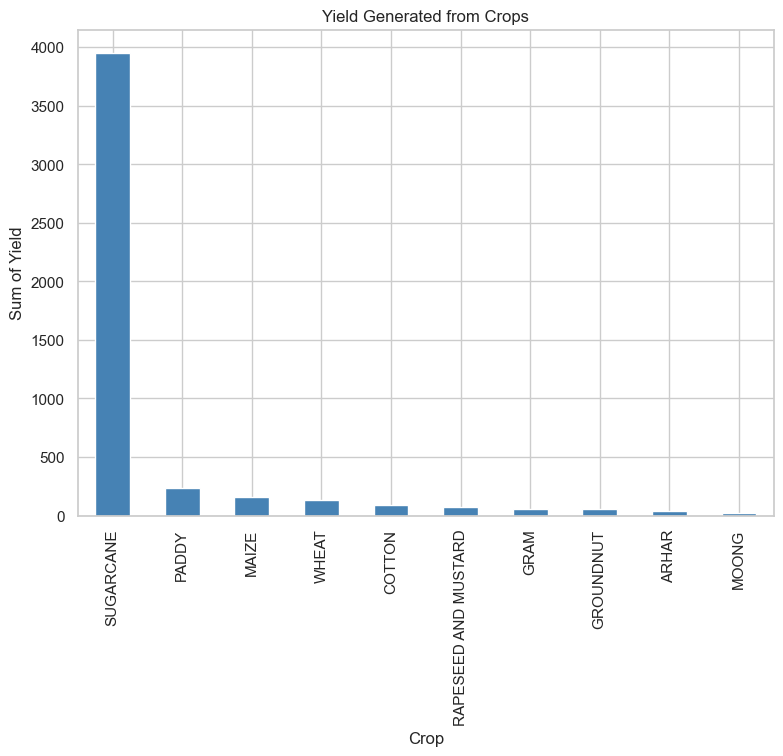

In [ ]:
crop_types = ['ARHAR', 'COTTON', 'GRAM', 'GROUNDNUT', 'MAIZE', 'MOONG', 'PADDY', 'RAPESEED AND MUSTARD', 'SUGARCANE', 'WHEAT']

filtered_data = data1[data1['Crop'].isin(crop_types)]
filtered_data.groupby('Crop')['Yield'].sum().sort_values(ascending=False).plot(kind='bar', title='Yield Generated from Crops', figsize=(8, 6), color='steelblue')
plt.xlabel("Crop")
plt.ylabel("Sum of Yield")
plt.show()


In [ ]:
# Calculate average values
avg_cost_production = data1['Cost_Production'].mean()
avg_yield = data1['Yield'].mean()

fig = go.Figure()

fig.add_trace(go.Bar(
    x=data1['State'],
    y=data1['Cost_Production'],
    name='Cost of Production',
    marker_color='royalblue'
))

fig.add_trace(go.Bar(
    x=data1['State'],
    y=data1['Yield'],
    name='Yield',
    marker_color='limegreen'
))

fig.add_trace(go.Scatter(
    x=data1['State'],
    y=[avg_cost_production] * len(data1),
    mode='lines',
    name='Average Cost of Production',
    line=dict(color='red', dash='dash')
))

fig.add_trace(go.Scatter(
    x=data1['State'],
    y=[avg_yield] * len(data1),
    mode='lines',
    name='Average Yield',
    line=dict(color='orange', dash='dash')
))

fig.update_layout(
    title='Cost of Production and Yield by State',
    xaxis_title='State',
    yaxis_title='Value',
    barmode='group',
    legend=dict(x=0, y=1.0, bgcolor='rgba(255, 255, 255, 0.5)', bordercolor='black', borderwidth=1)
)

fig.show()


<h3>DataFile2.csv</h3>

In [ ]:
data2.head()

Crop               Production 2006-07  Production 2007-08  \
0  Total Foodgrains               158.8               168.6   
1              Rice               200.8               207.9   
2             Wheat               131.6               136.4   
3             Jowar               124.3               137.8   
4             Bajra               136.4               161.5   

   Production 2008-09  Production 2009-10  Production 2010-11  Area 2006-07  \
0               171.3               159.4               178.9         128.5   
1               213.3               191.6               206.4         168.5   
2               140.1               140.3               150.8         115.0   
3               126.0               116.5               121.8         120.7   
4               143.9               105.4               167.9          94.5   

   Area 2007-08  Area 2008-09  Area 2009-10  Area 2010-11  Yield 2006-07  \
0         128.8         127.6         126.0         131.7          123.6   
1         168.9         175.1         161.2         164.8          119.2   
2         115.2         114.0         116.9         119.5          114.4   
3         110.6         107.3         111.0         105.2          103.0   
4          95.1          87.0          88.5          95.6          144.3   

   Yield 2007-08  Yield 2008-09  Yield 2009-10  Yield 2010-11  
0          130.9          134.3          126.5          135.9  
1          123.1          121.8          118.9          125.2  
2          118.4          122.8          120.0          126.3  
3          124.6          117.4          105.0          115.8  
4          169.7          165.4          119.0          175.8

In [ ]:
print(data2.columns)

Index(['Crop             ', 'Production 2006-07', 'Production 2007-08',
       'Production 2008-09', 'Production 2009-10', 'Production 2010-11',
       'Area 2006-07', 'Area 2007-08', 'Area 2008-09', 'Area 2009-10',
       'Area 2010-11', 'Yield 2006-07', 'Yield 2007-08', 'Yield 2008-09',
       'Yield 2009-10', 'Yield 2010-11'],
      dtype='object')


In [ ]:
data2.columns =data2.columns.str.strip() 

In [ ]:
data2.columns

Index(['Crop', 'Production 2006-07', 'Production 2007-08',
       'Production 2008-09', 'Production 2009-10', 'Production 2010-11',
       'Area 2006-07', 'Area 2007-08', 'Area 2008-09', 'Area 2009-10',
       'Area 2010-11', 'Yield 2006-07', 'Yield 2007-08', 'Yield 2008-09',
       'Yield 2009-10', 'Yield 2010-11'],
      dtype='object')

In [ ]:
traces = []
for crop in data2['Crop']:
    trace = go.Scatter(x=data2.columns[1:], y=data2[data2['Crop'] == crop].values.flatten()[1:], mode='lines+markers', name=crop)
    traces.append(trace)

layout = go.Layout(
    title='Crop Production and Yield',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Quantity'),
    legend=dict(x=0, y=1)
)
fig = go.Figure(data=traces, layout=layout)
fig.show()


In [ ]:
data2.head()

Crop  Production 2006-07  Production 2007-08  \
0  Total Foodgrains               158.8               168.6   
1              Rice               200.8               207.9   
2             Wheat               131.6               136.4   
3             Jowar               124.3               137.8   
4             Bajra               136.4               161.5   

   Production 2008-09  Production 2009-10  Production 2010-11  Area 2006-07  \
0               171.3               159.4               178.9         128.5   
1               213.3               191.6               206.4         168.5   
2               140.1               140.3               150.8         115.0   
3               126.0               116.5               121.8         120.7   
4               143.9               105.4               167.9          94.5   

   Area 2007-08  Area 2008-09  Area 2009-10  Area 2010-11  Yield 2006-07  \
0         128.8         127.6         126.0         131.7          123.6   
1         168.9         175.1         161.2         164.8          119.2   
2         115.2         114.0         116.9         119.5          114.4   
3         110.6         107.3         111.0         105.2          103.0   
4          95.1          87.0          88.5          95.6          144.3   

   Yield 2007-08  Yield 2008-09  Yield 2009-10  Yield 2010-11  
0          130.9          134.3          126.5          135.9  
1          123.1          121.8          118.9          125.2  
2          118.4          122.8          120.0          126.3  
3          124.6          117.4          105.0          115.8  
4          169.7          165.4          119.0          175.8

In [ ]:
print(data2.columns)

Index(['Crop', 'Production 2006-07', 'Production 2007-08',
       'Production 2008-09', 'Production 2009-10', 'Production 2010-11',
       'Area 2006-07', 'Area 2007-08', 'Area 2008-09', 'Area 2009-10',
       'Area 2010-11', 'Yield 2006-07', 'Yield 2007-08', 'Yield 2008-09',
       'Yield 2009-10', 'Yield 2010-11'],
      dtype='object')


<h5> Crop Production and Yield</h5>

In [ ]:
crops = ['Total Foodgrains', 'Rice', 'Wheat', 'Jowar', 'Bajra']
colors = ['steelblue', 'royalblue', 'cornflowerblue', 'lightskyblue', 'lightblue']

traces = []
for i, crop in enumerate(crops):
    trace = go.Bar(
        x=data2.columns[1:],
        y=data2.loc[data2['Crop'] == crop, data2.columns[1:]].values.flatten(),
        name=crop,
        marker=dict(color=colors[i])
    )
    traces.append(trace)

layout = go.Layout(
    title='Crop Production and Yield',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Quantity'),
    barmode='group'
)
fig = go.Figure(data=traces, layout=layout)
fig.show()

<h3> Datafile.csv  </h3>

In [ ]:
datafile.head()

Crop  2004-05  2005-06  2006-07  2007-08  2008-09  2009-10  \
0            Rice    100.0    101.0     99.0    105.0    112.0    121.0   
1           Wheat    100.0    101.0    112.0    115.0    117.0    127.0   
2  Coarse Cereals    100.0    107.0    110.0    115.0    113.0    123.0   
3          Pulses    100.0    108.0    134.0    124.0    124.0    146.0   
4     Vegetables     100.0    109.0    103.0    118.0    113.0    124.0   

   2010-11  2011-12  
0    117.0    110.0  
1    120.0    108.0  
2    122.0    136.0  
3    137.0    129.0  
4    128.0    115.0

In [ ]:
print(datafile.columns)

Index(['Crop', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09',
       '2009-10', '2010-11', '2011-12'],
      dtype='object')


In [ ]:
datafile.isnull().sum().sum()

9

In [ ]:
datafile.fillna(0, inplace=True)

In [ ]:
print('The duplicate values in the datafile is', datafile.duplicated().sum())

The duplicate values in the datafile is 0


In [ ]:
df=datafile

In [ ]:
datafile

Crop  2004-05  2005-06  2006-07  2007-08  2008-09  2009-10  \
0                  Rice    100.0    101.0     99.0    105.0    112.0    121.0   
1                 Wheat    100.0    101.0    112.0    115.0    117.0    127.0   
2        Coarse Cereals    100.0    107.0    110.0    115.0    113.0    123.0   
3                Pulses    100.0    108.0    134.0    124.0    124.0    146.0   
4           Vegetables     100.0    109.0    103.0    118.0    113.0    124.0   
5                Fruits    100.0     99.0     99.0     98.0    102.0    104.0   
6                  Milk    100.0     97.0     98.0     98.0     98.0    112.0   
7   Eggs, Fish and Meat    100.0    102.0    101.0    100.0     99.0    116.0   
8              Oilseeds    100.0     86.0     85.0     97.0    104.0    103.0   
9            Sugarcane     100.0     96.0     91.0     87.0     80.0     81.0   
10               Fibers    100.0     92.0     91.0     96.0    109.0    107.0   
11      All Agriculture    100.0     99.0    101.0    104.0    106.0    115.0   
12                    0      0.0      0.0      0.0      0.0      0.0      0.0   

    2010-11  2011-12  
0     117.0    110.0  
1     120.0    108.0  
2     122.0    136.0  
3     137.0    129.0  
4     128.0    115.0  
5     114.0    119.0  
6     123.0    124.0  
7     133.0    137.0  
8      99.0    102.0  
9     109.0    107.0  
10    138.0    140.0  
11    123.0    122.0  
12      0.0      0.0

<h5>Crop Growth Over Time</h5>


In [ ]:
import plotly.graph_objects as go
import pandas as pd

crops = ['Rice', 'Wheat', 'Coarse Cereals', 'Pulses', 'Vegetables']
colors = ['steelblue', 'royalblue', 'cornflowerblue', 'lightskyblue', 'lightblue']

traces = []
for i, crop in enumerate(crops):
    trace = go.Scatter(
        x=datafile.columns[1:],
        y=datafile.loc[datafile['Crop'] == crop, datafile.columns[1:]].values.flatten(),
        mode='lines+markers',
        name=crop,
        line=dict(color=colors[i])
    )
    traces.append(trace)

# Create the layout
layout = go.Layout(
    title='Crop Growth Over Time',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Percentage'),
)

# Create the figure
fig = go.Figure(data=traces, layout=layout)

# Show the figure
fig.show()


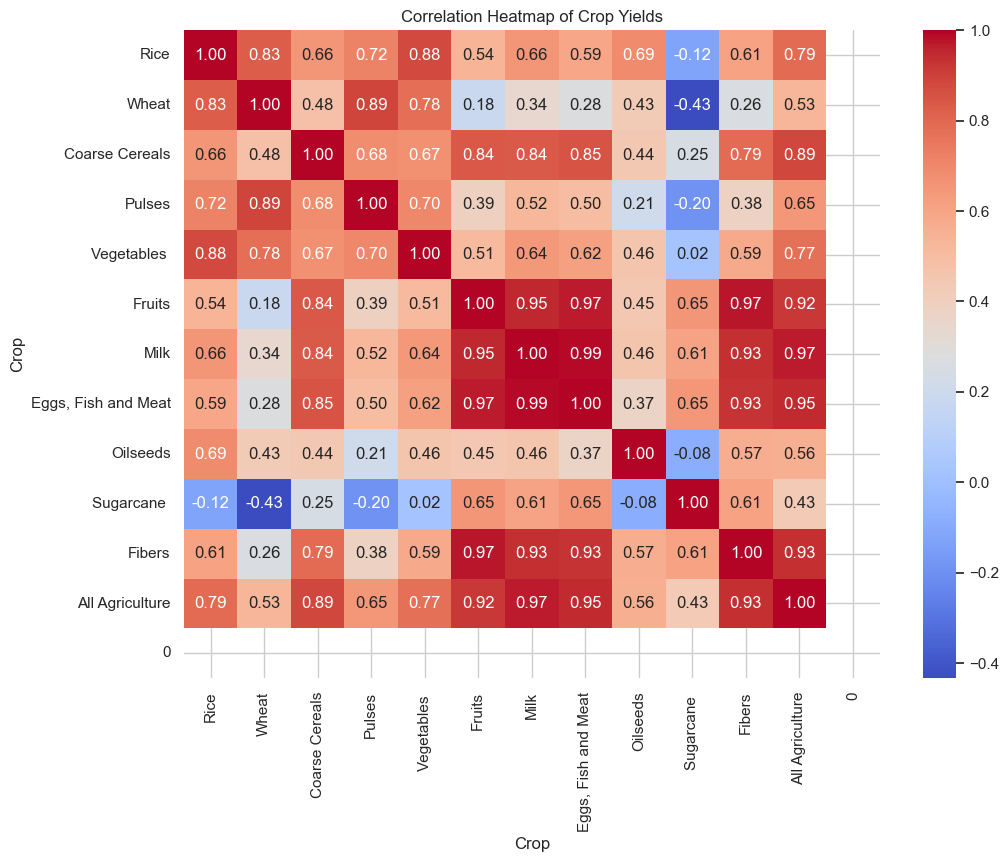

In [ ]:
df = df.set_index('Crop')
crop_data_transposed = df.transpose()
correlation_matrix = crop_data_transposed.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Crop Yields")
plt.show()

<h3> Produce.csv </h3>

In [ ]:
produce.head()

Particulars  \
0              Agricultural Production Foodgrains   
1       Agricultural Production Foodgrains Kharif   
2         Agricultural Production Foodgrains Rabi   
3         Agricultural Production Foodgrains Rice   
4  Agricultural Production Foodgrains Rice Kharif   

                         Frequency    Unit   3-1993   3-1994   3-1995  \
0  Annual, Ending mar Of Each Year  Ton mn      NaN      NaN      NaN   
1  Annual, Ending mar Of Each Year  Ton mn      NaN      NaN      NaN   
2  Annual, Ending mar Of Each Year  Ton mn      NaN      NaN      NaN   
3  Annual, Ending mar Of Each Year  Ton mn      NaN      NaN      NaN   
4  Annual, Ending mar Of Each Year  Ton mn      NaN      NaN      NaN   

    3-1996   3-1997   3-1998   3-1999  ...     3-2005    3-2006     3-2007  \
0      NaN      NaN      NaN      NaN  ...  198.36282  208.6016  217.28212   
1      NaN      NaN      NaN      NaN  ...  103.30942  109.8734  110.57622   
2      NaN      NaN      NaN      NaN  ...   95.05340   98.7282  106.70590   
3      NaN      NaN      NaN      NaN  ...   83.13170   91.7934   93.35530   
4      NaN      NaN      NaN      NaN  ...   72.23000   78.2719   80.17080   

      3-2008      3-2009      3-2010      3-2011      3-2012   3-2013  \
0  230.77504  234.466177  218.107372  244.491809  259.286253   257.13   
1  120.95724  118.138577  103.954032  120.853191  131.274812   128.07   
2  109.81780  116.327600  114.153340  123.638618  128.011441   129.06   
3   96.69290   99.182500   89.092901   95.979819  105.301100   105.24   
4   82.65940   84.908200   75.916510   80.651241   92.780700    92.37   

     3-2014  
0  264.3806  
1  129.3686  
2  135.0120  
3  106.2872  
4   92.0093  

[5 rows x 25 columns]

In [ ]:
print(produce.columns)

Index(['Particulars', 'Frequency', 'Unit', ' 3-1993', ' 3-1994', ' 3-1995',
       ' 3-1996', ' 3-1997', ' 3-1998', ' 3-1999', ' 3-2000', ' 3-2001',
       ' 3-2002', ' 3-2003', ' 3-2004', ' 3-2005', ' 3-2006', ' 3-2007',
       ' 3-2008', ' 3-2009', ' 3-2010', ' 3-2011', ' 3-2012', ' 3-2013',
       ' 3-2014'],
      dtype='object')


In [ ]:
produce.isnull().sum().sum()

5166

In [ ]:
produce.fillna(0, inplace=True)

In [ ]:
print('The duplicate values in the produce is', produce.duplicated().sum())

The duplicate values in the produce is 0


In [ ]:
produce.head()

Particulars  \
0              Agricultural Production Foodgrains   
1       Agricultural Production Foodgrains Kharif   
2         Agricultural Production Foodgrains Rabi   
3         Agricultural Production Foodgrains Rice   
4  Agricultural Production Foodgrains Rice Kharif   

                         Frequency    Unit   3-1993   3-1994   3-1995  \
0  Annual, Ending mar Of Each Year  Ton mn      0.0      0.0      0.0   
1  Annual, Ending mar Of Each Year  Ton mn      0.0      0.0      0.0   
2  Annual, Ending mar Of Each Year  Ton mn      0.0      0.0      0.0   
3  Annual, Ending mar Of Each Year  Ton mn      0.0      0.0      0.0   
4  Annual, Ending mar Of Each Year  Ton mn      0.0      0.0      0.0   

    3-1996   3-1997   3-1998   3-1999  ...     3-2005    3-2006     3-2007  \
0      0.0      0.0      0.0      0.0  ...  198.36282  208.6016  217.28212   
1      0.0      0.0      0.0      0.0  ...  103.30942  109.8734  110.57622   
2      0.0      0.0      0.0      0.0  ...   95.05340   98.7282  106.70590   
3      0.0      0.0      0.0      0.0  ...   83.13170   91.7934   93.35530   
4      0.0      0.0      0.0      0.0  ...   72.23000   78.2719   80.17080   

      3-2008      3-2009      3-2010      3-2011      3-2012   3-2013  \
0  230.77504  234.466177  218.107372  244.491809  259.286253   257.13   
1  120.95724  118.138577  103.954032  120.853191  131.274812   128.07   
2  109.81780  116.327600  114.153340  123.638618  128.011441   129.06   
3   96.69290   99.182500   89.092901   95.979819  105.301100   105.24   
4   82.65940   84.908200   75.916510   80.651241   92.780700    92.37   

     3-2014  
0  264.3806  
1  129.3686  
2  135.0120  
3  106.2872  
4   92.0093  

[5 rows x 25 columns]

<h5>Production Over Time</h5>

In [ ]:
fig = go.Figure()

for i, row in produce.iterrows():
    crop = row['Particulars']
    years = produce.columns[3:]
    production = row[3:]

    fig.add_trace(go.Scatter(
        x=years,
        y=production,
        mode='lines+markers',
        name=crop
    ))

fig.update_layout(
    title='Agricultural Production Over Time',
    xaxis_title='Year',
    yaxis_title='Production (Ton mn)'
)

fig.show()


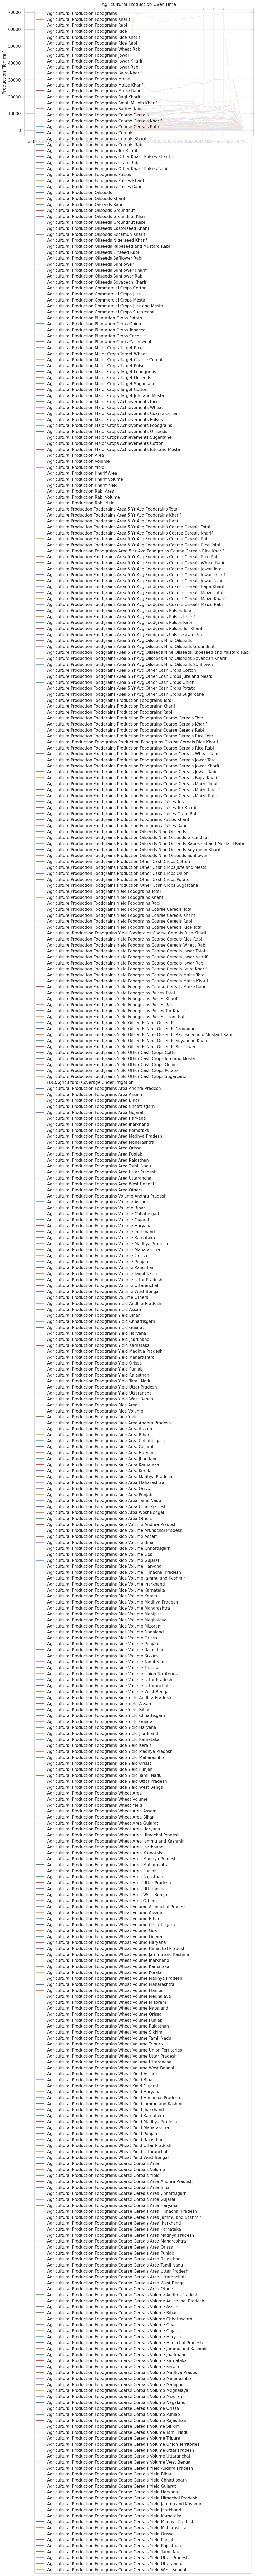

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set_style("whitegrid")

# Create the line plot
plt.figure(figsize=(10, 6))
for i, row in produce.iterrows():
    crop = row['Particulars']
    years = produce.columns[3:]
    production = row[3:]
    sns.lineplot(x=years, y=production, label=crop)

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Production (Ton mn)')
plt.title('Agricultural Production Over Time')

# Display the plot
plt.show()


<h2> Prediction and Evaluation </h2>


In [ ]:
# %%capture
# !pip install graphviz

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import export_graphviz
import graphviz

# Split the data into input features (X) and target variable (y)
X = data1[['Cost_A2_FL', 'Cost_C2', 'Cost_Production']]
y = data1['Yield']


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train the models
models = {
    'Decision Tree': DecisionTreeRegressor(),
    'Linear Regression': LinearRegression(),
    'XGBoost': XGBRegressor(),
    'Random Forest': RandomForestRegressor()
}

predictions = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions[model_name] = model.predict(X_test)

# Evaluate the models
evaluation = {}
for model_name, y_pred in predictions.items():
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    evaluation[model_name] = {'MSE': mse, 'MAE': mae}

# Visualize the decision tree model using Graphviz
dot_data = export_graphviz(models['Decision Tree'], out_file=None,
                           feature_names=X.columns, filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)

# Display the Graphviz visualization
graph.render(filename='decision_tree', format='png', cleanup=True)

# Visualize the results
fig = go.Figure()
for model_name, y_pred in predictions.items():
    fig.add_trace(go.Scatter(
        x=y_test.index,
        y=y_pred,
        mode='markers',
        name=model_name
    ))
fig.add_trace(go.Scatter(
    x=y_test.index,
    y=y_test,
    mode='markers',
    name='Actual'
))
fig.update_layout(
    title='Crop Yield Prediction',
    xaxis_title='Data Point',
    yaxis_title='Yield',
)
fig.show()

# Display the evaluation results
print('Evaluation Results:')
for model_name, metrics in evaluation.items():
    print(f'{model_name}:')
    print(f'MSE: {metrics["MSE"]}')
    print(f'MAE: {metrics["MAE"]}')
    print('---')

Evaluation Results:
Decision Tree:
MSE: 6677.658100000005
MAE: 30.04200000000001
---
Linear Regression:
MSE: 28230.054046904657
MAE: 124.1650703739479
---
XGBoost:
MSE: 113.11858814325804
MAE: 6.5234736404419
---
Random Forest:
MSE: 3183.725513042004
MAE: 21.629540000000013
---


<h2> Decision Tree Graph

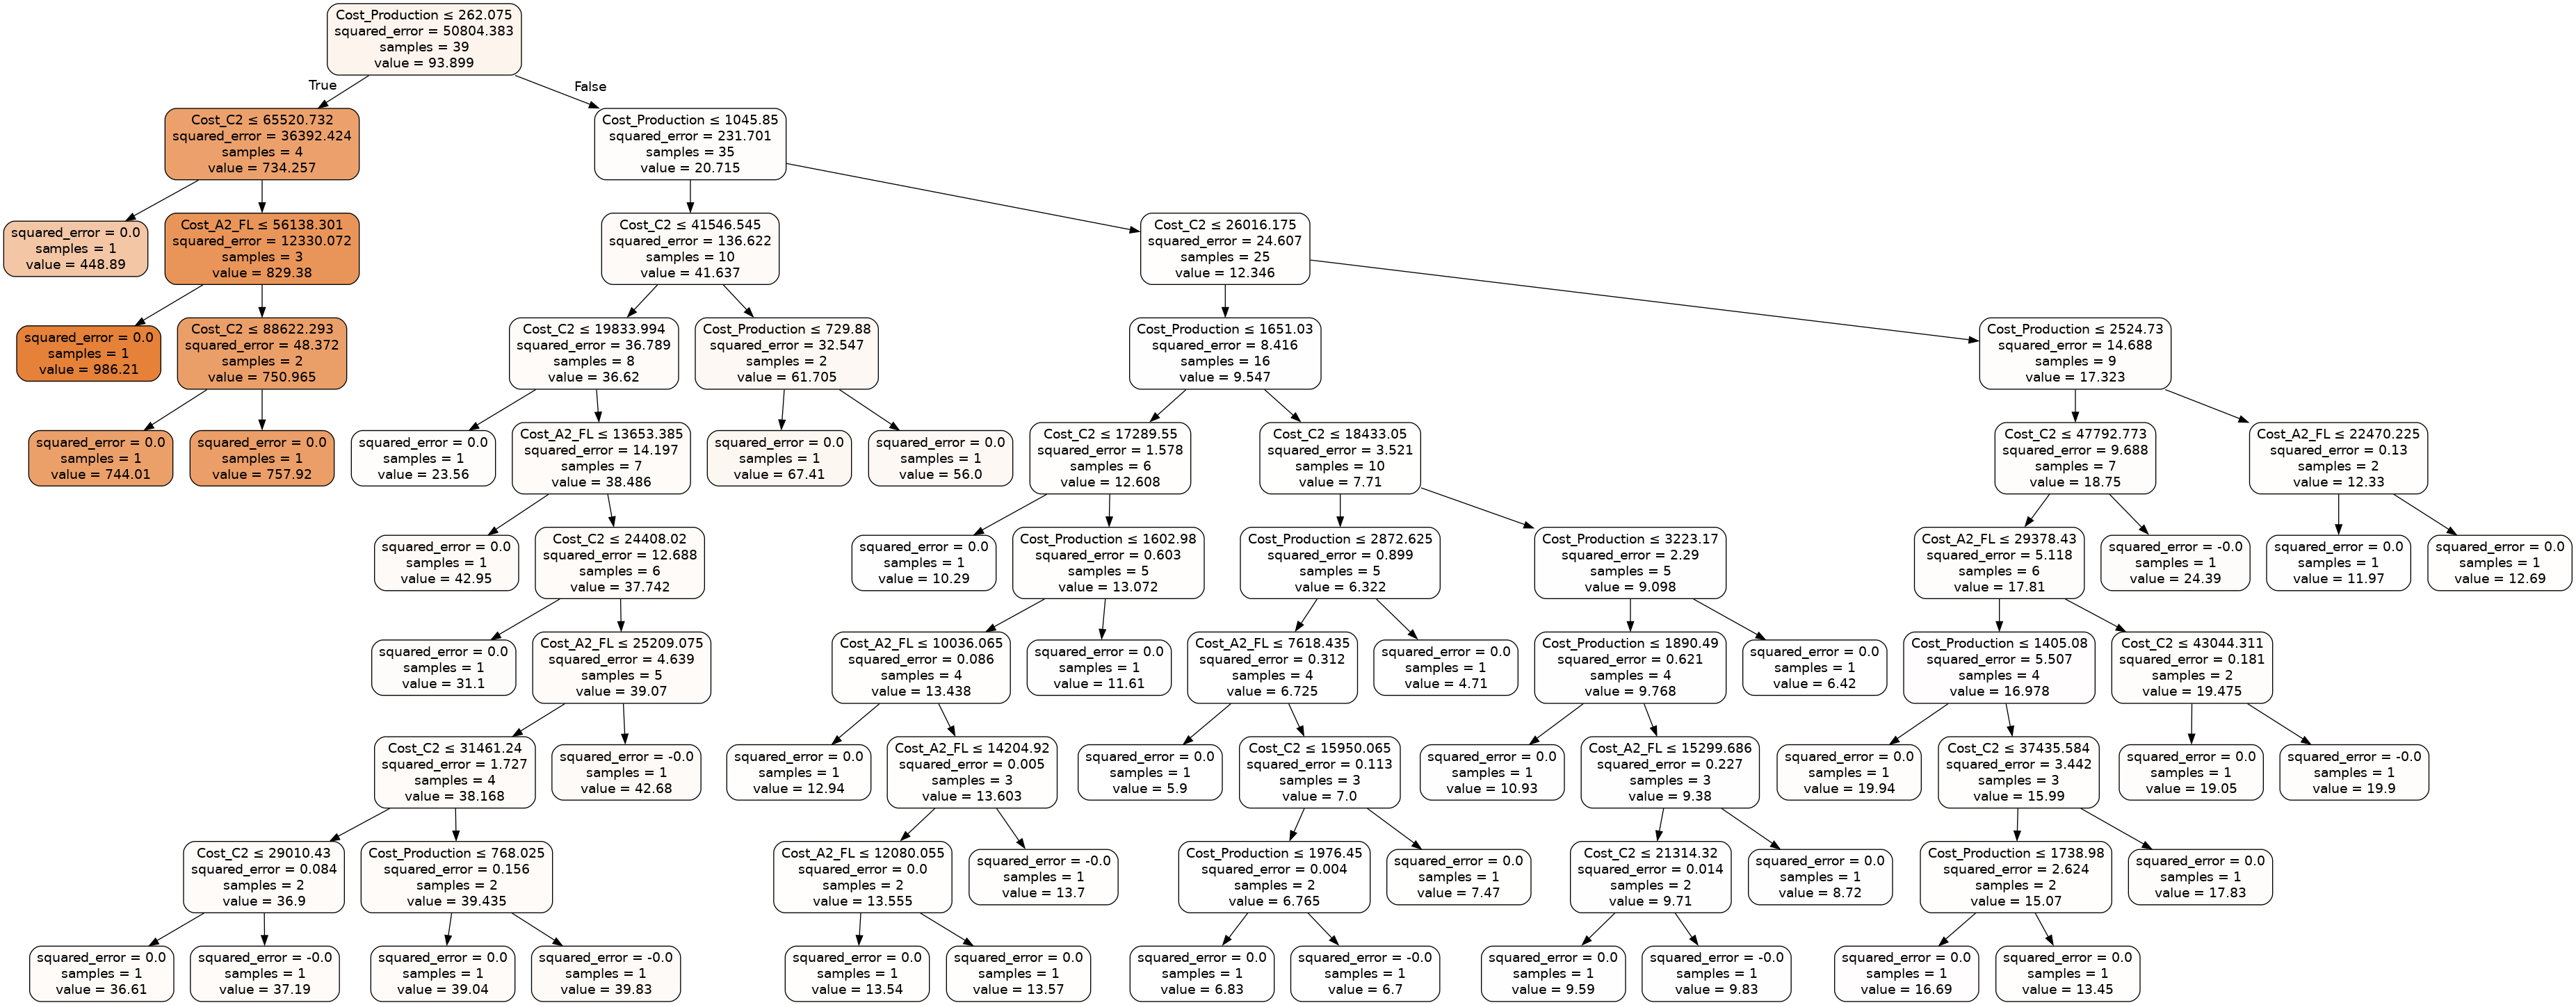

In [ ]:
import graphviz
from IPython.display import Image, display

# Create a Graphviz object from the dot file
graph = graphviz.Source(dot_data)

# Set the format and filename to save the image
image_format = 'png'
image_filename = 'graph'

# Save the Graphviz visualization as an image
graph.format = image_format
graph.render(filename=image_filename, format=image_format, cleanup=True)

# Display the image with a specific size
image_path = f'{image_filename}.{image_format}'
display(Image(filename=image_path, width=1000, height=800))


# Large graphviz on this part

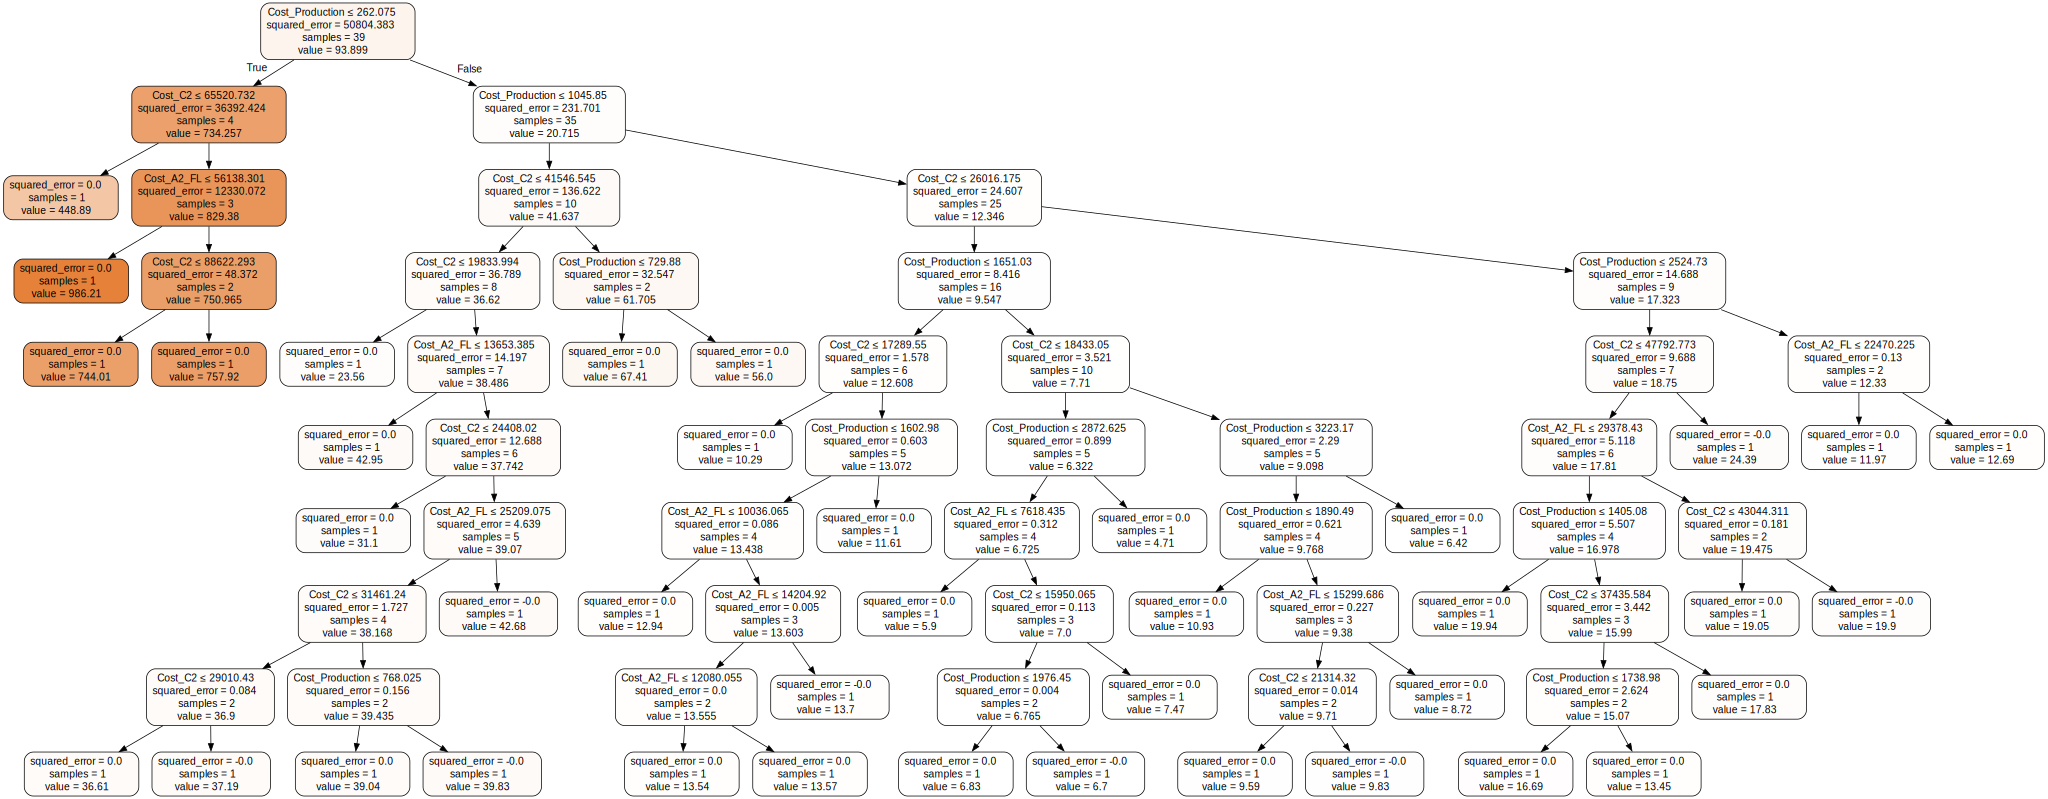

In [ ]:
import graphviz
from IPython.display import display

# Create a Graphviz object from the dot file
graph = graphviz.Source(dot_data)

# Display the graph
display(graph)
